<div align=center style="line-height:200%;font-family:vazir;font-size:medium;color:#0099cc">
<h1>
<font face="vazirmatn" color="#0099cc">
یونیدرو
</font>
</h1>
</p>
</div>

<h2 align=right style="direction: rtl; text-align: right; line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazirmatn" color="#0099cc">
آشنایی با نقشه‌ی حرارتی (Heatmap) 
</font>
</h2>

<div style="line-height:200%;font-family:vazir;font-size:medium">
<p style="direction: rtl;text-align: justify;">
<font face="vazirmatn" size=3>

نقشه‌ی حرارتی روشی برای نمایش داده‌ها در امور تحلیل داده‌ای می‌باشد که در آن رنگ‌ها متناسب با بزرگی و کوچکی اعداد تغییر می‌کنند. در نقشه‌های حرارتی، از یک تابع نگاشت رنگ (color map) برای تبدیل اعداد به رنگ‌ها استفاده می‌شود. نقشه‌ی حرارتی کاربرد‌های بسیاری دارد و در حوزه‌های مختلفی می‌توان برای نمایش اطلاعات از آن استفاده کرد. محققان داده معمولاً هنگامی‌که می‌خواهند نتایج کار را به شکلی قابل فهم به افراد غیر‌متخصص نشان دهند از نقشه‌ی حرارتی استفاده می‌کند. فرض کنید یک مجموعه‌داده‌ی بزرگ در اختیار دارید و رابطه‌ی همه‌ی ستون‌ها را با هم به‌صورت یک‌به‌یک محاسبه کرده‌اید. اگر بخواهید نتایج به‌دست‌آمده را به فرد دیگری نشان دهید، ارائه‌ی تمام اعداد راه‌‌حل ساده‌ای نمی‌باشد. به جای آن، می‌توان یک نقشه‌ی حرارتی ایجاد کرد که با یک نگاه به آن، خیلی سریع متغیر‌های به‌هم‌وابسته شناسایی می‌شوند چون رنگ آنها متفاوت است. در این تمرین با استفاده از نقشه‌ی حرارتی رابطه بین عناصر مختلف در این مجموعه‌داده را مشخص می‌کنیم.
</font>
</p>
</div>


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL.ImageColor import colormap

<h2 align=right style="direction: rtl; text-align: right; line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazirmatn" color="#0099cc">
مجموعه‌داده
</font>
</h2>

<div style="line-height:200%;font-family:vazir;font-size:medium">
<p style="direction: rtl;text-align: justify;">
<font face="vazirmatn" size=3>
داده‌های این تمرین در فایل <code>unidro_data.csv</code> قرار گرفته است. ابتدا این فایل را به‌شکل یک دیتافریم خوانده و نگاهی به آن بیندازیم.
</font>
</p>
</div>

In [2]:
df = pd.read_csv('unidro_data.csv')
df.head()

,Au8,Au8_CN,Au,Ag,Al,As,B,Ba,Ca,Ce,...,P,Pb,S,Sb,Sr,Th,Ti,V,Y,Zn
0,0.67,32.40,2.068,1.7,5300,649,12,205,300,97,...,900,1227,27600,592,16,22,18,10,21,388
1,0.08,8.82,0.907,0.8,6900,451,13,345,400,103,...,1180,251,17600,237,20,22,19,9,18,567
2,0.04,6.80,0.588,0.9,6900,1007,17,210,400,98,...,990,121,17700,317,18,22,22,10,17,552
3,0.55,7.00,7.855,1.1,10600,19627,13,140,500,94,...,1240,158,37300,1454,25,24,22,18,21,5965
4,0.15,20.60,0.728,21.3,7900,5776,14,123,1800,75,...,1430,17270,69700,582,28,19,20,10,20,1394



<div style="line-height:200%;font-family:vazir;font-size:medium">
<p style="direction: rtl;text-align: justify;">
<font face="vazirmatn" size=3>
داده‌های این تمرین، از اطلاعات واقعی عناصر و عیار آن‌ها که شرکت یونیدرو از آن‌ها استفاده می‌کند، به‌‌دست‌ آمده است. در صنایع معدن، نمونه‌های یک گرمی را با دستگاهی به نام <i>ICP-OES</i>
 مورد بررسی قرار می‌دهند و دستگاه، غلظت عناصر موجود در آن نمونه‌ی یک‌گرمی را به ما می‌دهد. واحد غلظت، <i>ppm (part per million)</i> می‌باشد. در این دیتافریم، ۱۲۲۶ نمونه‌ی یک‌گرمی مورد بررسی قرار گرفته‌اند و غلظت عناصر مورد نظر ما (۳۱ عنصر)، به‌‌دست‌ آمده‌اند. در این تمرین، می‌خواهیم بررسی کنیم که آیا رابطه‌ی معناداری بین عیار عناصر وجود دارد یا خیر. یعنی با افزایش یک عنصر در یک نمونه، چه عناصری کاهش یا افزایش می‌یابند.
</font>
</p>
</div>

In [3]:
df.shape

(1226, 31)

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazirmatn" color="#0099cc">
قسمت اول
</font>
</h2>
<div style="line-height:200%;font-family:vazir;font-size:medium">
<p style="direction: rtl;text-align: justify;">
<font face="vazirmatn" size=3>
ماتریس هم‌بستگی (correlation)  بین ستون‌های این دیتافریم را به‌دست آورید.
</font>
</p>
</div>

In [7]:
corr_matrix = df.corr()


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazirmatn" color="#0099cc">
قسمت دوم
</font>

</h2>
<div style="line-height:200%;font-family:vazir;font-size:medium">
<p style="direction: rtl;text-align: justify;">
<font face="vazirmatn" size=3>
<ul style="direction: rtl;text-align: justify;">
  <li>
با مت‌پلات، یک شکل شامل یک صفحه‌محور بسازید و اندازه‌ی طول و عرض آن را به ترتیب برابر ۱۲ و ۱۰ اینچ قرار دهید.
</li>

  <li>
با استفاده از تابع <code>heatmap</code> سیبورن، بر روی صفحه‌محوری که ساختید، یک نقشه‌ی حرارتی بکشید. ماتریس رابطه‌ای که در قسمت اول به‌‌دست‌ آمد را به آن بدهید. همچنین از نگاشت رنگ <code>viridis</code> استفاده کنید.

</li>

  <li>
عنوان نمودار را برابر <code>correlation heatmap</code> قرار دهید.

</li>

</ul>
</font>
</p>
</div>

Text(0.5, 1.0, 'correlation heatmap')

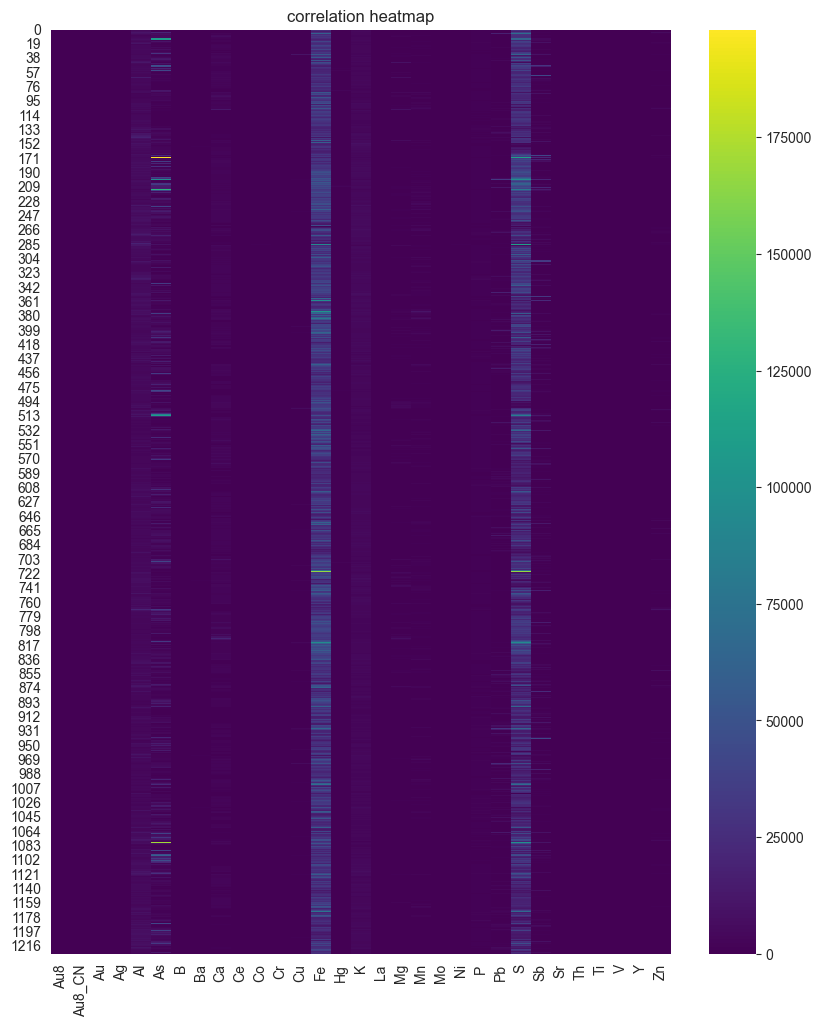

In [17]:
fig1, ax1 = plt.subplots(figsize=(10,12))
sns.heatmap(df, cmap='viridis')
ax1.set_title('correlation heatmap')


<div style="line-height:200%;font-family:vazir;font-size:medium">
<p style="direction: rtl;text-align: justify;">
<font face="vazirmatn" size=3>
اگر با دقت به خروجی قسمت دوم نگاه کنید، می‌بینید که این شکل متقارن است. به این دلیل که رابطه ویژگی 
<code>x</code>
 و 
 <code>y</code>
  با رابطه ویژگی 
  <code>y</code>
   و 
   <code>x</code>
    برابر است. یعنی هر مقدار دو بار حساب شده است و ماتریس از روی قطر متقارن است.
</font>
</p>
</div>



<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazirmatn" color="#0099cc">
قسمت سوم
</font>
</h2>
<div style="line-height:200%;font-family:vazir;font-size:medium">
<p style="direction: rtl;text-align: justify;">
<font face="vazirmatn" size=3>
ماسک (mask)، آرایه‌ای است که اجزای آن فقط صفر و یک (یا <code>True</code> و <code>False</code>) می‌باشند. نمونه‌هایی از ماسک را در فصل نامپای و پانداز دیدید.
در این قسمت می‌خواهیم یک ماسک بسازیم و از آن برای نمایش مثلث پایینی نقشه‌ی حرارتی استفاده کنیم.
<br>

<ul style="direction: rtl;text-align: justify;">
  <li>
با استفاده از نامپای، ماسکی بسازید که مثلث پایینی آن (درایه‌های زیر قطر) مقدار صفر باشد و خانه‌های بالای قطر (و خود قطر)، مقدار یک داشته باشند.
</li>

  <li>
این ماسک باید ۳۱ سطر و ۳۱ ستون داشته باشد.</li>
</ul>
</font>
</p>
</div>

In [25]:
import numpy as np
my_mask = np.zeros((31, 31))

my_mask[np.triu_indices(31)] = 1

print(my_mask)


[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazirmatn" color="#0099cc">
قسمت چهارم
</font>
</h2>
<div style="line-height:200%;font-family:vazir;font-size:medium">
<p style="direction: rtl;text-align: justify;">
<font face="vazirmatn" size=3>
<ul style="direction: rtl;text-align: justify;">
  <li>
با مت‌پلات، یک شکل شامل یک صفحه‌محور بسازید و اندازه‌ی طول و عرض آن را به ترتیب برابر ۱۲ و ۱۰ اینچ قرار دهید.
</li>

  <li>
با استفاده از تابع <code>heatmap</code> سیبورن، بر روی صفحه‌محوری که ساختید، یک نقشه‌ی حرارتی بکشید. ماتریس رابطه‌ای که در بخش اول به‌‌دست آمد را به آن بدهید. این‌بار از نگاشت رنگ <code>jet</code> استفاده کنید.

</li>

  <li>
ماسکی که در بخش قبل ساختید را در آرگومان <code>mask</code> به تابع <code>heatmap</code> بدهید تا فقط قسمت پایینی نقشه حرارتی رسم شود. خانه‌هایی که مقدار <code>mask</code> آن‌ها برابر یک می‌باشد، رسم نمی‌شوند.

</li>

  <li>
عنوان نمودار را برابر <code>correlation heatmap lower triangular</code> قرار دهید.
</li>

</ul>
</font>
</p>
</div>

Text(0.5, 1.0, 'correlation heatmap lower triangular')

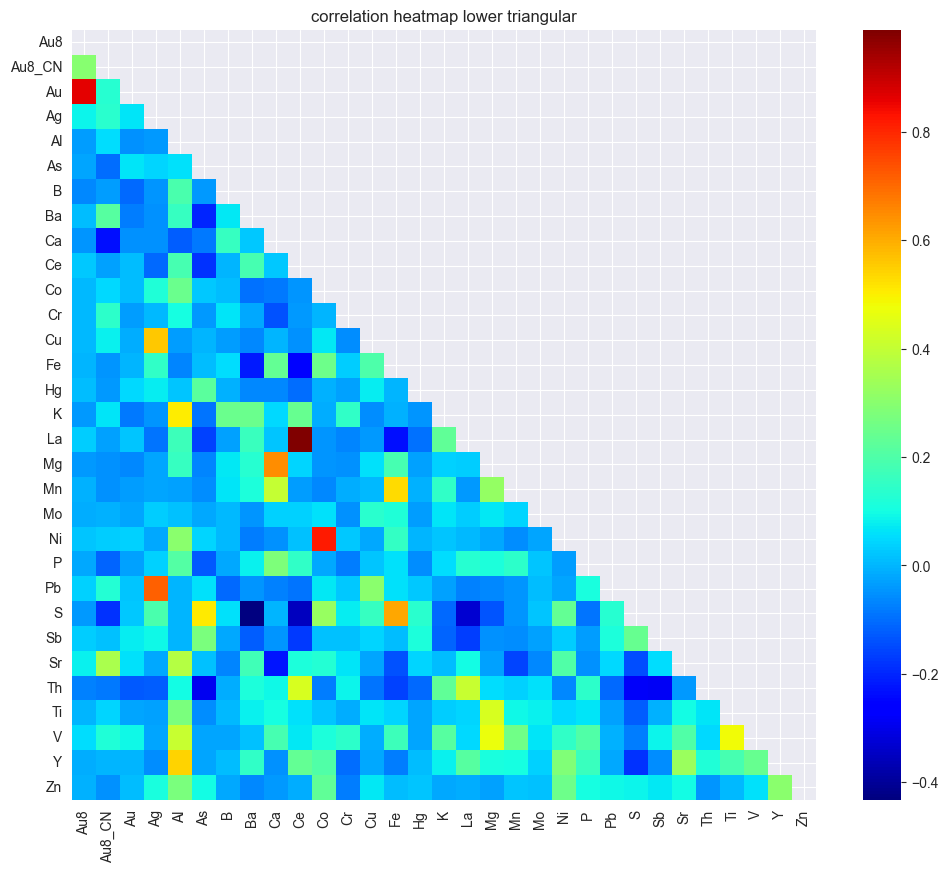

In [29]:
fig2, ax2 = plt.subplots(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='jet', mask=my_mask)
ax2.set_title('correlation heatmap lower triangular')


<h3 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazirmatn" color="#0099cc">
توابع نگاشت رنگ
</font>
</h3>
<div style="line-height:200%;font-family:vazir;font-size:medium">
<p style="direction: rtl;text-align: justify;">
<font face="vazirmatn" size=3>
در این تمرین از دو تابع نگاشت رنگ استفاده کردید. انتخاب نگاشت رنگ متناسب با نیاز ما و نوع مسئله مشخص می‌شود. هر تابع نگاشت رنگ، اعداد را به طیف مخصوصی از رنگ‌ها نگاشت می‌کند. این طیف می‌تواند شامل یک، دو یا حتی همه‌ی رنگ‌ها باشد. مت‌پلات توابع نگاشت رنگ متنوعی دارد که در
 <a href="https://matplotlib.org/stable/tutorials/colors/colormaps.html
">این لینک </a>
  می‌توانید با آن‌ها آشنا شوید.
</font>
</p>
</div>


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazirmatn" color="#0099cc">
<b>سلول جواب‌ساز</b>
</font>
</h2>


<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazirmatn" size=3>
    برای ساخته‌شدن فایل <code>result.zip</code> سلول زیر را اجرا کنید. توجه داشته باشید که پیش از اجرای سلول زیر تغییرات اعمال شده در نت‌بوک را ذخیره کرده باشید (<code>ctrl+s</code>) تا در صورت نیاز به پشتیبانی امکان بررسی کد شما وجود داشته باشد.
</font>
</p>

In [30]:
import zlib
import zipfile
import joblib

joblib.dump(fig2,"fig2")
joblib.dump(fig1,"fig1")
np.savez("answers.npz", corr_matrix = corr_matrix.to_numpy(), my_mask = my_mask)

def compress(file_names):
    print("File Paths:")
    print(file_names)
    compression = zipfile.ZIP_DEFLATED
    with zipfile.ZipFile("result.zip", mode="w") as zf:
        for file_name in file_names:
            zf.write('./' + file_name, file_name, compress_type=compression)

file_names = ["fig2","fig1","answers.npz", "unidro.ipynb"]
compress(file_names)

File Paths:
['fig2', 'fig1', 'answers.npz', 'unidro.ipynb']
